In [1]:
from math import sqrt
import scipy.stats as stats
import pandas as pd

In [2]:
hyp = pd.read_csv(r"C:\Users\Vaibhav\Desktop\BA\Datasets\Sample_data.csv")
hyp.head()

,ID,Gender,Race,SEB,School,Prog,Read,Write,Math1,Math2,SST
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56
4,172,0,4,2,1,2,47,52,57,53,61


----

## CONT + FACTOR (Where 2 levels)

### T-test for unequal variances
- no. of rows in sample 1 != no. of rows in sample 2
- When the 2 samples are not related. 
- H0: mean is equal for the 2 samples or the mean difference in the writing / reading marks for the 2 genders is not significant. Mean(0) = Mean(1)
- HA: mean not equal for the 2 samples. Mean difference in the marks according to gender is significantly greater than 0. Mean Marks (Gender = 0) != Mean Marks (Gender = 1)

In [5]:
#Read and Gender variables 

In [6]:
hyp.Gender.value_counts()

1    109
0     91
Name: Gender, dtype: int64

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

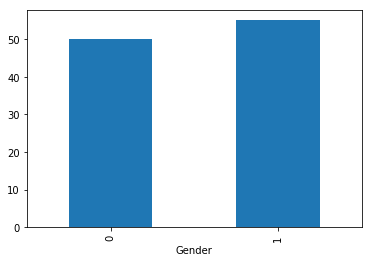

In [8]:
hyp.groupby("Gender").Write.mean().plot.bar()

In [5]:
g = hyp.groupby("Gender")

In [17]:
group0 = g.get_group(0).Write
len(group0)

91

In [18]:
group1 = g.get_group(1).Write
len(group1)

109

In [11]:
#to statistically analyse the difference in mean scores of 2 independent distributions of unequal size, we'll use t-test for unequal variance


H0: mean(Male) - mean(Female) for Read = 0

H0: there is no significant difference between marks male and female

Ha: mean(Male) - mean(Female) for Read != 0 

Ha: there is  significant difference between marks male and female

So here we are hypothizing over the difference bet the means of 2 popln


### Direct Formula: ttest_ind(sample1, sample2)

In [12]:
hyp.head(3)

,ID,Gender,Race,SEB,School,Prog,Read,Write,Math1,Math2,SST
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31


In [11]:
#hyp[hyp["Gender"]==0].Read

In [12]:
#hyp[hyp["Gender"]==1].Read

In [13]:
stats.ttest_ind(hyp[hyp["Gender"]==0].Read, hyp[hyp["Gender"]==1].Read)
#ttest of 2 independent samples
#null hypothesis is retained. Average reading marks don't vary significantly according to gender. 
#Hence Gender not leading to a significant variance in Reading marks. 

Ttest_indResult(statistic=0.7480109580953392, pvalue=0.4553410655360075)

In [4]:
stats.ttest_ind(hyp[hyp["Gender"]==0].Write, hyp[hyp["Gender"]==1].Write)
#ttest of 2 independent samples

Ttest_indResult(statistic=-3.7340738531536797, pvalue=0.00024625461203549315)

In [110]:
#pvalue <= alpha = 5% implies reject the null hypothesis
#pvalue > alpha = 5% means retain the null hypothesis
#mean difference in writing scores due to gender is statistically significant. We reject the null; 
#p < alpha = 1%. Average writing marks differ significantly according to gender.
#Hence Gender here is a significant variable leading to variance in writing marks.

---

## CONT + CONT for the same respondents
- Correlations

In [111]:
hyp[["Math1", "Math2"]].corr()

,Math1,Math2
Math1,1.000000,0.630733
Math2,0.630733,1.000000


---

## CONT + FACTORS (with more than 2 levels)
- with 2 levels we prefer to use t-test of unequal variances

## ANOVA - Analysis of Variance
- used for features selection if our response variable is continuous

In [112]:
#continuous variable ~ factor(s)
#Factor is also known as treatment


In [20]:
hyp.head(5)

,ID,Gender,Race,SEB,School,Prog,Read,Write,Math1,Math2,SST
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56
4,172,0,4,2,1,2,47,52,57,53,61


In [21]:
hyp.Prog.nunique()

3

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols #ordinary least squares

In [16]:
prices= [15,12,14,11,39,45,48,60,65,45,32]
brands = ["Snapzi"]*4 + ["Irisa"]*4 + ["Lolamoon"]*3
print(prices, brands)
df = pd.DataFrame({'price':prices, 'brand': brands})
df

[15, 12, 14, 11, 39, 45, 48, 60, 65, 45, 32] ['Snapzi', 'Snapzi', 'Snapzi', 'Snapzi', 'Irisa', 'Irisa', 'Irisa', 'Irisa', 'Lolamoon', 'Lolamoon', 'Lolamoon']


,price,brand
0,15,Snapzi
1,12,Snapzi
2,14,Snapzi
3,11,Snapzi
4,39,Irisa
5,45,Irisa
6,48,Irisa
7,60,Irisa
8,65,Lolamoon
9,45,Lolamoon


H0: Ave price(Snapzi) = Ave.price(Irisa) = Ave Price(Lolamoon)

HA: Ave. Price(Snapzi) != Ave. Price(Irisa)
- or Ave. Price(Irisa) != Ave. Price(Lolamoon)
- or Ave. Price(Lolamoon)!= Ave. Price(Snapzi)
- i.e either of the price is significantly differnet

If average price of either of the brands is significantly different, then we'll conclude that brand is a significant var which is leading to significant variance in prices.

In [17]:
mod = ols('price~brand', data=df) #y has to be continuous 
mod = mod.fit() #ols ordinary least squares - trying to fit a line on the scatterplot b/w y and x which is minimizing sse
aov = sm.stats.anova_lm(mod) #fitted ols model to be passed
print(aov)

           df       sum_sq      mean_sq          F    PR(>F)
brand     2.0  3068.242424  1534.121212  15.405401  0.001805
Residual  8.0   796.666667    99.583333        NaN       NaN


In [ ]:
#Since the p-value is .18%, so we can reject the H0 with alpha = 1%. 
#There is a significant difference in the average prices according to the brands. 
#but we still don't know which 2 brands differ significantly in prices

In [10]:
stats.ttest_ind(df[df["brand"]=="Snapzi"].price,df[df["brand"]=="Irisa"].price)
#p value of .024% indicates that the difference in the average prices of Irisa and Snapzi is significant 

Ttest_indResult(statistic=-7.761823345023015, pvalue=0.00024052437577656274)

In [11]:
stats.ttest_ind(df[df["brand"]=="Snapzi"].price,df[df["brand"]=="Lolamoon"].price)

Ttest_indResult(statistic=-4.237570937167752, pvalue=0.008188631177791119)

In [118]:
stats.ttest_ind(df[df["brand"]=="Irisa"].price,df[df["brand"]=="Lolamoon"].price)
#the 2 brands don't differ significantly in pricing

Ttest_indResult(statistic=0.06958890006392186, pvalue=0.9472182863995552)

---

In [119]:
#Another example on 1-way Anova

In [120]:
hyp.head(2)

,ID,Gender,Race,SEB,School,Prog,Read,Write,Math1,Math2,SST
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61


In [121]:
hyp.Prog.unique()

array([1, 3, 2], dtype=int64)

In [12]:
mod = ols('SST ~ Prog', data=hyp).fit()
aov = sm.stats.anova_lm(mod) #fitted ols model to be passed
print(aov)

             df        sum_sq     mean_sq         F    PR(>F)
Prog        1.0    874.396845  874.396845  7.847528  0.005594
Residual  198.0  22061.798155  111.423223       NaN       NaN


In [13]:
#reject H0 
#hence program is a signficant variable leading to variance in SST scores

----

## Cont + Factor + Factor - 2-Way Anova

In [124]:
print(pd.value_counts(hyp.SEB))
print()
print(pd.value_counts(hyp.Prog))
print()
pd.crosstab(hyp.Prog, hyp.SEB)

2    95
3    58
1    47
Name: SEB, dtype: int64

2    105
3     50
1     45
Name: Prog, dtype: int64



SEB,1,2,3
Prog,,,
1,16,20,9
2,19,44,42
3,12,31,7


Read ~ SEB + Prog

In [125]:
hyp.groupby("SEB").Read.mean()
#H0: the marks obtained in Read is similar across SEB
#Ha: there is atleast one significantly different SEB leading to variance in reading marks

SEB
1    48.276596
2    51.578947
3    56.500000
Name: Read, dtype: float64

In [126]:
hyp.groupby("Prog").Read.mean()
#H0: the marks obtained in Read is similar across Prog
#Ha: there is atleast one pair of programs having significant difference in the mean marks of Read


Prog
1    49.755556
2    56.161905
3    46.200000
Name: Read, dtype: float64

In [15]:
#variable ~ treatment
mod = ols('Read ~ Prog+SEB', data=hyp).fit() 
aov_table = sm.stats.anova_lm(mod) #fitted ols model to be passed
print(aov_table)
#SEB and Program both are leading to variance in reading marks
#Since the p-values of SEB are far smaller, so it's leading to a higher variance in the reading marks

             df        sum_sq      mean_sq          F    PR(>F)
Prog        1.0    381.101686   381.101686   4.012865  0.046525
SEB         1.0   1829.233326  1829.233326  19.261175  0.000019
Residual  197.0  18709.084988    94.969975        NaN       NaN


In [128]:
hyp.groupby(["SEB", "Prog"]).Read.mean().unstack()
#H0: the marks obtained in Read is similar across SEB and Program
#Ha: there is atleast one significantly different SEB and Prog

Prog,1,2,3
SEB,,,
1,47.562500,53.000000,41.750000
2,51.050000,54.681818,47.516129
3,50.777778,59.142857,48.000000


### n-way anova

In [20]:
hyp.columns

Index(['ID', 'Gender', 'Race', 'SEB', 'School', 'Prog', 'Read', 'Write',
       'Math1', 'Math2', 'SST'],
      dtype='object')

In [21]:
X = hyp.drop(["ID", "SST"], axis = 1)
X.columns

Index(['Gender', 'Race', 'SEB', 'School', 'Prog', 'Read', 'Write', 'Math1',
       'Math2'],
      dtype='object')

In [22]:
s = 'SST ~ '+"+".join(X.columns)
s

'SST ~ Gender+Race+SEB+School+Prog+Read+Write+Math1+Math2'

In [23]:
mod = ols(s, data=hyp).fit() #What is the result across the prog, SEB and combination of Prog and SEB
aov_table = sm.stats.anova_lm(mod) #fitted ols model to be passed

In [24]:
print(aov_table)

             df        sum_sq      mean_sq           F        PR(>F)
Gender      1.0     62.905152    62.905152    1.051514  3.064623e-01
Race        1.0    828.314546   828.314546   13.845999  2.612185e-04
SEB         1.0   2200.243337  2200.243337   36.778982  7.003657e-09
School      1.0     34.135604    34.135604    0.570606  4.509535e-01
Prog        1.0    848.002527   848.002527   14.175100  2.219458e-04
Read        1.0   6045.026477  6045.026477  101.047879  2.469028e-19
Write       1.0   1438.726257  1438.726257   24.049562  2.009492e-06
Math1       1.0     77.259856    77.259856    1.291466  2.572093e-01
Math2       1.0     35.137533    35.137533    0.587354  4.443951e-01
Residual  190.0  11366.443712    59.823388         NaN           NaN


In [143]:
round(aov_table["PR(>F)"]*100, 2)
#hence reject H0 for Race, SEB, Prog, Read and Write, since they are < alpha = 5%
#retain H0 for Gender, School, Math1 and Math2 since p values are greater than 5%
#Hence Gender, School, Math1 and Math2 are not creating significant variance in the y variable

Gender      30.65
Race         0.03
SEB          0.00
School      45.10
Prog         0.02
Read         0.00
Write        0.00
Math1       25.72
Math2       44.44
Residual      NaN
Name: PR(>F), dtype: float64

---

## FACTOR + FACTOR VARS: CHI-SQUARE TEST

### Chi square test of independence - for 2 factor variables (categorical variables)

In [30]:
hyp.Race.value_counts()

4    145
1     24
3     20
2     11
Name: Race, dtype: int64

In [31]:
hyp.Prog.value_counts()

2    105
3     50
1     45
Name: Prog, dtype: int64

In [32]:
hyp.head(10)

,ID,Gender,Race,SEB,School,Prog,Read,Write,Math1,Math2,SST
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56
4,172,0,4,2,1,2,47,52,57,53,61
5,113,0,4,2,1,2,44,52,51,63,61
6,50,0,3,2,1,1,50,59,42,53,61
7,11,0,1,2,1,2,34,46,45,39,36
8,84,0,4,2,1,1,63,57,54,58,51
9,48,0,3,2,1,2,57,55,52,50,51


In [33]:
contigency_table = pd.crosstab(hyp.Prog,hyp.Race, margins=True)
contigency_table

Race,1,2,3,4,All
Prog,,,,,
1,4,4,5,32,45
2,11,6,9,79,105
3,9,1,6,34,50
All,24,11,20,145,200


In [34]:
chi_square , p_value, degrees_of_freedom, expected_frequencies=stats.chi2_contingency(contigency_table)
print(expected_frequencies)

[[  5.4    2.48   4.5   32.62  45.  ]
 [ 12.6    5.78  10.5   76.12 105.  ]
 [  6.     2.75   5.    36.25  50.  ]
 [ 24.    11.    20.   145.   200.  ]]


In [35]:
degrees_of_freedom #(number of levels in var1 - 1)*(number of levels in var2-1)

12

In [36]:
print(chi_square, p_value) 
#H0 retained expected freq not significantly different from actual frequency. 
#The 2 vars are independent.

4.858235889270372 0.9625469833821574


In [58]:
#for choice of program and gender
contigency_table_1 = pd.crosstab(hyp.Prog,hyp.Gender,margins = True)
contigency_table_1

Gender,0,1,All
Prog,,,
1,21,24,45
2,47,58,105
3,23,27,50
All,91,109,200


In [59]:
chi_square , p_value, degrees_of_freedom, expected_frequencies = stats.chi2_contingency(contigency_table_1)
expected_frequencies

array([[ 20.475,  24.525,  45.   ],
       [ 47.775,  57.225, 105.   ],
       [ 22.75 ,  27.25 ,  50.   ],
       [ 91.   , 109.   , 200.   ]])

In [37]:
p_value #chi-square distribution is a right skewed distribution, so we are only bothered of right tail probabilies here. 
#A p-value of 96% does not mean 4% is the left extreme prob, since we are not bothered about left extreme probabilities in chisq. 
#It simply means that right extreme prob. is 96% and hence we retain null.
#hence the 2 vars are not associated. H0 is retained. The expected values are very close to observed values
#chisq. value is very small, H0 retained, hence the 2 variables  are independent

0.9625469833821574